## [Basic-of-Machine-Learning]
<br/>

- 선형 분류
    - Linear SVM (support vector machine) 실습
    <br/><br/>

- 퍼셉트론
    - 퍼셉트론을 사용한 AND 게이트 구현
    - 가중치(w)와 편향(b) 도입
    - 편향(b)을 추가하여 NAND, OR 게이트 구현
    <br/><br/>
    
- 다층 퍼셉트론
    - AND, NAND, OR 게이트를 각각 1개씩 사용하여 XOR 게이트 구현
    - 활성화 함수 구현(tanh 함수, sigmoid 함수, ReLU 함수)
    - 4-layered 신경망 실습
    <br/><br/>
    

- ###  선형 분류기 실습
    - 입력 데이터 : 위스콘신 유방암 데이터 세트
    - 종양의 크기, 모양 등 30개의 속성(feature) 값을 기반으로 해당 종양이 악성인지 양성인지를 분류한 데이터 세트
    - scikit-learn 패키지에서 제공하는 머신러닝 오픈 데이터셋의 한 종류
    - 분류기 모델 : linear SVM
    <br/>

In [1]:
import sklearn.datasets as d
import numpy as np
import pandas as pd

# breast_cancer 데이터 세트 로드
dataset = d.load_breast_cancer()
cancer = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer.head()

C:\Users\User\anaconda3\envs\py_365\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\envs\py_365\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\User\anaconda3\envs\py_365\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = np.array(dataset['data'])
y = np.array(dataset['target'])

print(np.shape(X), np.shape(y))

(569, 30) (569,)


In [4]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=100)

print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(398, 30) (171, 30) (398,) (171,)


In [7]:
import sklearn.svm as svm
import sklearn.metrics as mt

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

accuracy = mt.accuracy_score(y_test, y_pred)
print(accuracy)

0.9532163742690059


- ###  AND 게이트 구현
    <br/>

In [8]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    if tmp > theta:
        return 1

In [9]:
AND(0,0)

0

In [10]:
AND(0, 1)

0

In [11]:
AND(1, 0)

0

In [12]:
AND(1, 1)

1

- ###  가중치와 편향 도입
    - 편향(b)을 추가하여 NAND, OR 게이트 구현
    <br/>

In [14]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

In [15]:
w * x

array([0. , 0.5])

In [16]:
np.sum(w * x)

0.5

In [17]:
np.sum(w * x) + b

-0.19999999999999996

In [18]:
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(NAND(0, 0), NAND(0, 1), NAND(1, 0), NAND(1, 1))

1 1 1 0


In [19]:
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(OR(0, 0), OR(0, 1), OR(1, 0), OR(1, 1))

0 1 1 1


- ###  다층퍼셉트론
    - AND, NAND, OR 게이트를 각각 1개씩 사용하여 XOR 게이트 구현
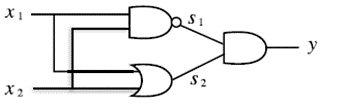

In [20]:
import numpy as np

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    if tmp > theta:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1))

0 1 1 0


- ###  활성화 함수
    - Tanh 함수 : 실수 값을 입력 받아 0보다 클 때 1을 출력하고, 0보다 작을 때 -1을 출력하는 비선형 함수
    - Sigmoid 함수 : 실수 값을 입력 받아 0보다 클 때 1을 출력하고, 0보다 작을 때 0을 출력하는 비선형 함수
    - ReLU (rectified linear unit) 함수 : 입력값이 0을 넘으면 입력값 그대로 출력하고, 0 이하면 0으로 출력하는 비선형 함수
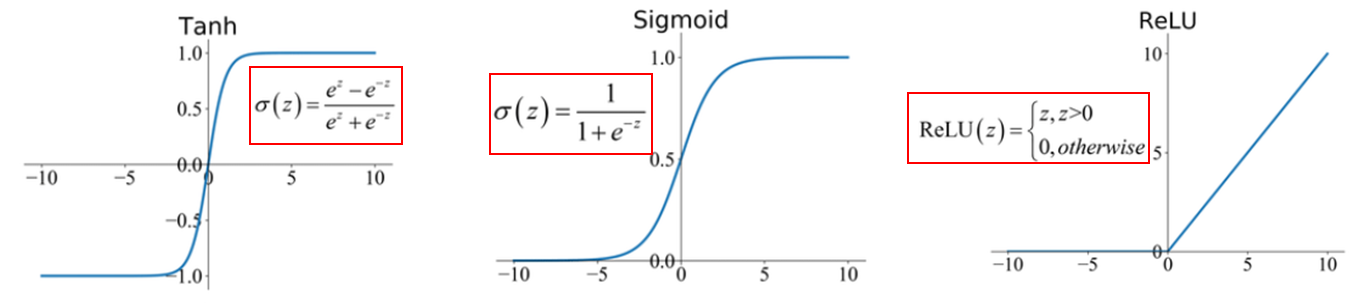

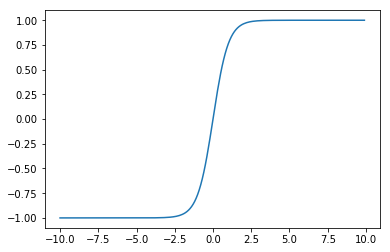

In [27]:
# Tanh function
import numpy as np
import matplotlib.pyplot as plt           # = import matplotlib.pylab as plt

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.arange(-10.0, 10.0, 0.1)
y = tanh(x)

plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

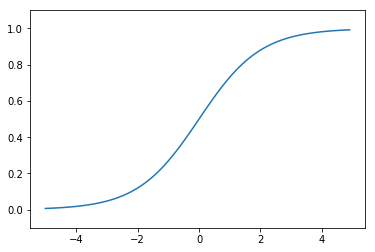

In [28]:
# Sigmoid function
import numpy as np
import matplotlib.pyplot as plt           # = import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

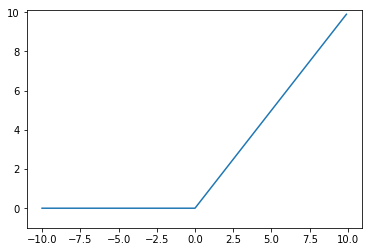

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10.0, 10.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 10.1)
plt.show()

- ###  4-layered 퍼셉트론 실습

In [35]:
import sklearn.datasets as d
import numpy as np
import pandas as pd

# breast_cancer 데이터 세트 로드
dataset = d.load_breast_cancer()
cancer = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer.head()

X = np.array(dataset['data'])
y = np.array(dataset['target'])

print(np.shape(X), np.shape(y))

import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=100)

print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=10)

acc = model.evaluate(X_test, y_test)[1]
print('\n acc : %.4f' % acc)

(569, 30) (569,)
(398, 30) (171, 30) (398,) (171,)
Epoch 1/200
398/398 [==============================] - 0s 373us/step - loss: 26.3347 - accuracy: 0.4648
Epoch 2/200
398/398 [==============================] - 0s 353us/step - loss: 1.4147 - accuracy: 0.6834
Epoch 3/200
398/398 [==============================] - 0s 227us/step - loss: 0.4670 - accuracy: 0.8593
Epoch 4/200
398/398 [==============================] - 0s 201us/step - loss: 0.3454 - accuracy: 0.8920
Epoch 5/200
398/398 [==============================] - 0s 227us/step - loss: 0.3354 - accuracy: 0.8894
Epoch 6/200
398/398 [==============================] - 0s 174us/step - loss: 0.2931 - accuracy: 0.8920
Epoch 7/200
398/398 [==============================] - 0s 115us/step - loss: 0.2797 - accuracy: 0.8970
Epoch 8/200
398/398 [==============================] - 0s 155us/step - loss: 0.2591 - accuracy: 0.9146
Epoch 9/200
398/398 [==============================] - 0s 146us/step - loss: 0.2205 - accuracy: 0.9070
Epoch 10/200
398/398 

398/398 [==============================] - 0s 178us/step - loss: 0.1624 - accuracy: 0.9447
Epoch 80/200
398/398 [==============================] - 0s 163us/step - loss: 0.1437 - accuracy: 0.9372
Epoch 81/200
398/398 [==============================] - 0s 110us/step - loss: 0.1347 - accuracy: 0.9472
Epoch 82/200
398/398 [==============================] - 0s 148us/step - loss: 0.1608 - accuracy: 0.9397
Epoch 83/200
398/398 [==============================] - 0s 174us/step - loss: 0.1558 - accuracy: 0.9347
Epoch 84/200
398/398 [==============================] - 0s 167us/step - loss: 0.1556 - accuracy: 0.9372
Epoch 85/200
398/398 [==============================] - 0s 168us/step - loss: 0.1261 - accuracy: 0.9422
Epoch 86/200
398/398 [==============================] - 0s 155us/step - loss: 0.1708 - accuracy: 0.9271
Epoch 87/200
398/398 [==============================] - 0s 216us/step - loss: 0.1290 - accuracy: 0.9548
Epoch 88/200
398/398 [==============================] - 0s 158us/step - loss:

398/398 [==============================] - 0s 92us/step - loss: 0.1263 - accuracy: 0.9447
Epoch 158/200
398/398 [==============================] - 0s 126us/step - loss: 0.1215 - accuracy: 0.9573
Epoch 159/200
398/398 [==============================] - 0s 120us/step - loss: 0.1057 - accuracy: 0.9548
Epoch 160/200
398/398 [==============================] - 0s 101us/step - loss: 0.1017 - accuracy: 0.9548
Epoch 161/200
398/398 [==============================] - 0s 99us/step - loss: 0.1559 - accuracy: 0.9296
Epoch 162/200
398/398 [==============================] - 0s 132us/step - loss: 0.4511 - accuracy: 0.8618
Epoch 163/200
398/398 [==============================] - 0s 172us/step - loss: 0.1767 - accuracy: 0.9397
Epoch 164/200
398/398 [==============================] - 0s 204us/step - loss: 0.1673 - accuracy: 0.9372
Epoch 165/200
398/398 [==============================] - 0s 174us/step - loss: 0.2349 - accuracy: 0.9246
Epoch 166/200
398/398 [==============================] - 0s 134us/step 